# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.003
-0.001
-0.002
-0.002
0.0
0.001
-0.001
-0.001
0.0
0.997
1.0
1.001
0.998
0.999
1.973
1.985
1.977
1.977
1.978
2.972
2.975
2.976
2.976
2.975
3.977
3.981
3.982
3.981
3.98
4.979
4.982
4.983
4.982
4.982
5.981
5.985
5.985
5.984
5.984
6.675
6.674
6.674
6.673
7.36
7.364
7.364
7.364
7.364
8.362
8.367
8.367
8.366
8.365
9.365
9.368
9.369
9.368
9.368
10.364
10.366
10.369
10.368
10.368
11.366
11.37
11.37
11.37
11.369
12.365
12.367
12.369
12.369
12.368
13.366
13.37
13.37
13.37
13.37
14.064
14.065
14.068
14.067
14.068
14.765
14.769
14.769
14.768
14.767
15.769
15.769
15.769
15.771
16.771
16.775
16.775
16.774
17.776
17.776
18.772
18.776
18.777
18.777
18.777
19.774
19.779
19.778
19.778
19.778
20.774
20.778
20.778
20.778
21.474
21.477
21.477
21.476
21.477
22.176
22.173
22.174
22.174
23.175
23.178
23.178
23.177
23.177
24.173
24.176
24.176
24.175
24.175
25.171
25.174
25.172
25.172
25.173
26.172
26.174
26.174
26.173
26.173
2

56.963
56.963
56.963
56.963
56.963
56.963
56.963
56.963
56.963
56.962
56.962
56.962
56.961
56.961
56.961
56.962
56.961
56.961
56.96
56.961
56.956
57.109
57.149
57.149
57.149
57.149
57.198
57.198
57.198
57.198
57.198
57.2
57.2
57.199
57.199
57.198
57.198
57.198
57.197
57.197
57.198
57.198
57.198
57.197
57.196
57.196
57.196
57.196
57.196
57.196
57.188
57.192
57.192
57.192
57.192
57.192
57.192
57.192
57.193
57.193
57.193
57.193
57.193
57.193
57.193
57.193
57.193
57.192
57.192
57.412
57.415
57.423
57.404
57.404
57.438
57.438
57.438
57.438
57.438
57.437
57.435
57.435
57.435
57.435
57.434
57.434
57.433
57.433
57.434
57.434
57.434
57.434
57.434
57.434
57.434
57.434
57.433
57.432
57.432
57.432
57.432
57.432
57.432
57.432
57.432
57.432
57.432
57.431
57.433
57.43
57.43
57.43
57.43
57.481
57.54
57.579
57.579
57.578
57.57
57.626
57.626
57.626
57.626
57.626
57.626
57.624
57.624
57.623
57.625
57.625
57.625
57.625
57.625
57.623
57.622
57.622
57.624
57.624
57.625
57.624
57.623
57.625
57.913
57.913
57.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1401,2802,59.557
1402,2804,59.557
1403,2806,59.556
1404,2808,59.556


<IPython.core.display.Javascript object>


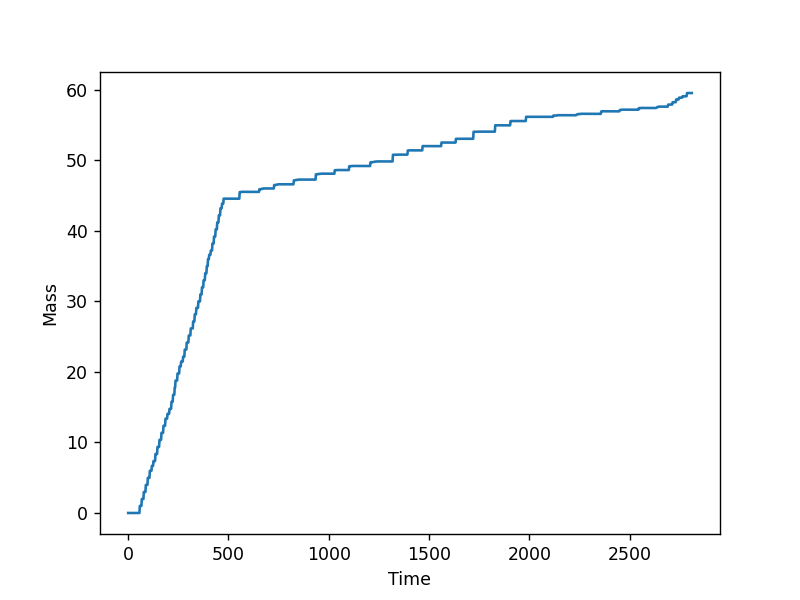

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_190523_S481-486.csv')